# Rock VS Mine Prediction using Logistic Regression

## 1. Data Exploration

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

In [2]:
# Loading the Dataset 
df = pd.read_csv('sonardata.csv', header = None)

In [3]:
# Printing the first 5 rows of the Dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# Printing the last 5 rows of the Dataset
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [5]:
# (Rows and Columns) of the Dataset
df.shape

(208, 61)

In [6]:
# Priniting the Information about the Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [7]:
# Statistical Measure of the Data
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
# Printing the Distribution of the Rock and Mine 
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [9]:
# Mapping the object as an Integer
df[60] = df[60].map({'M' : 0, 'R' : 1})

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [12]:
# Checking for Empty/Null Values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [13]:
#Checking for Duplicate Values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
203    False
204    False
205    False
206    False
207    False
Length: 208, dtype: bool

In [14]:
# Correlation b/w the Parameters in a Dataset
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,-0.271694
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,-0.231238
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,-0.192195
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,-0.250638
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,-0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,...,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,-0.000933
57,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,-0.184191
58,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,-0.130826
59,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,-0.090055


### 3. Data Visualization

<Axes: >

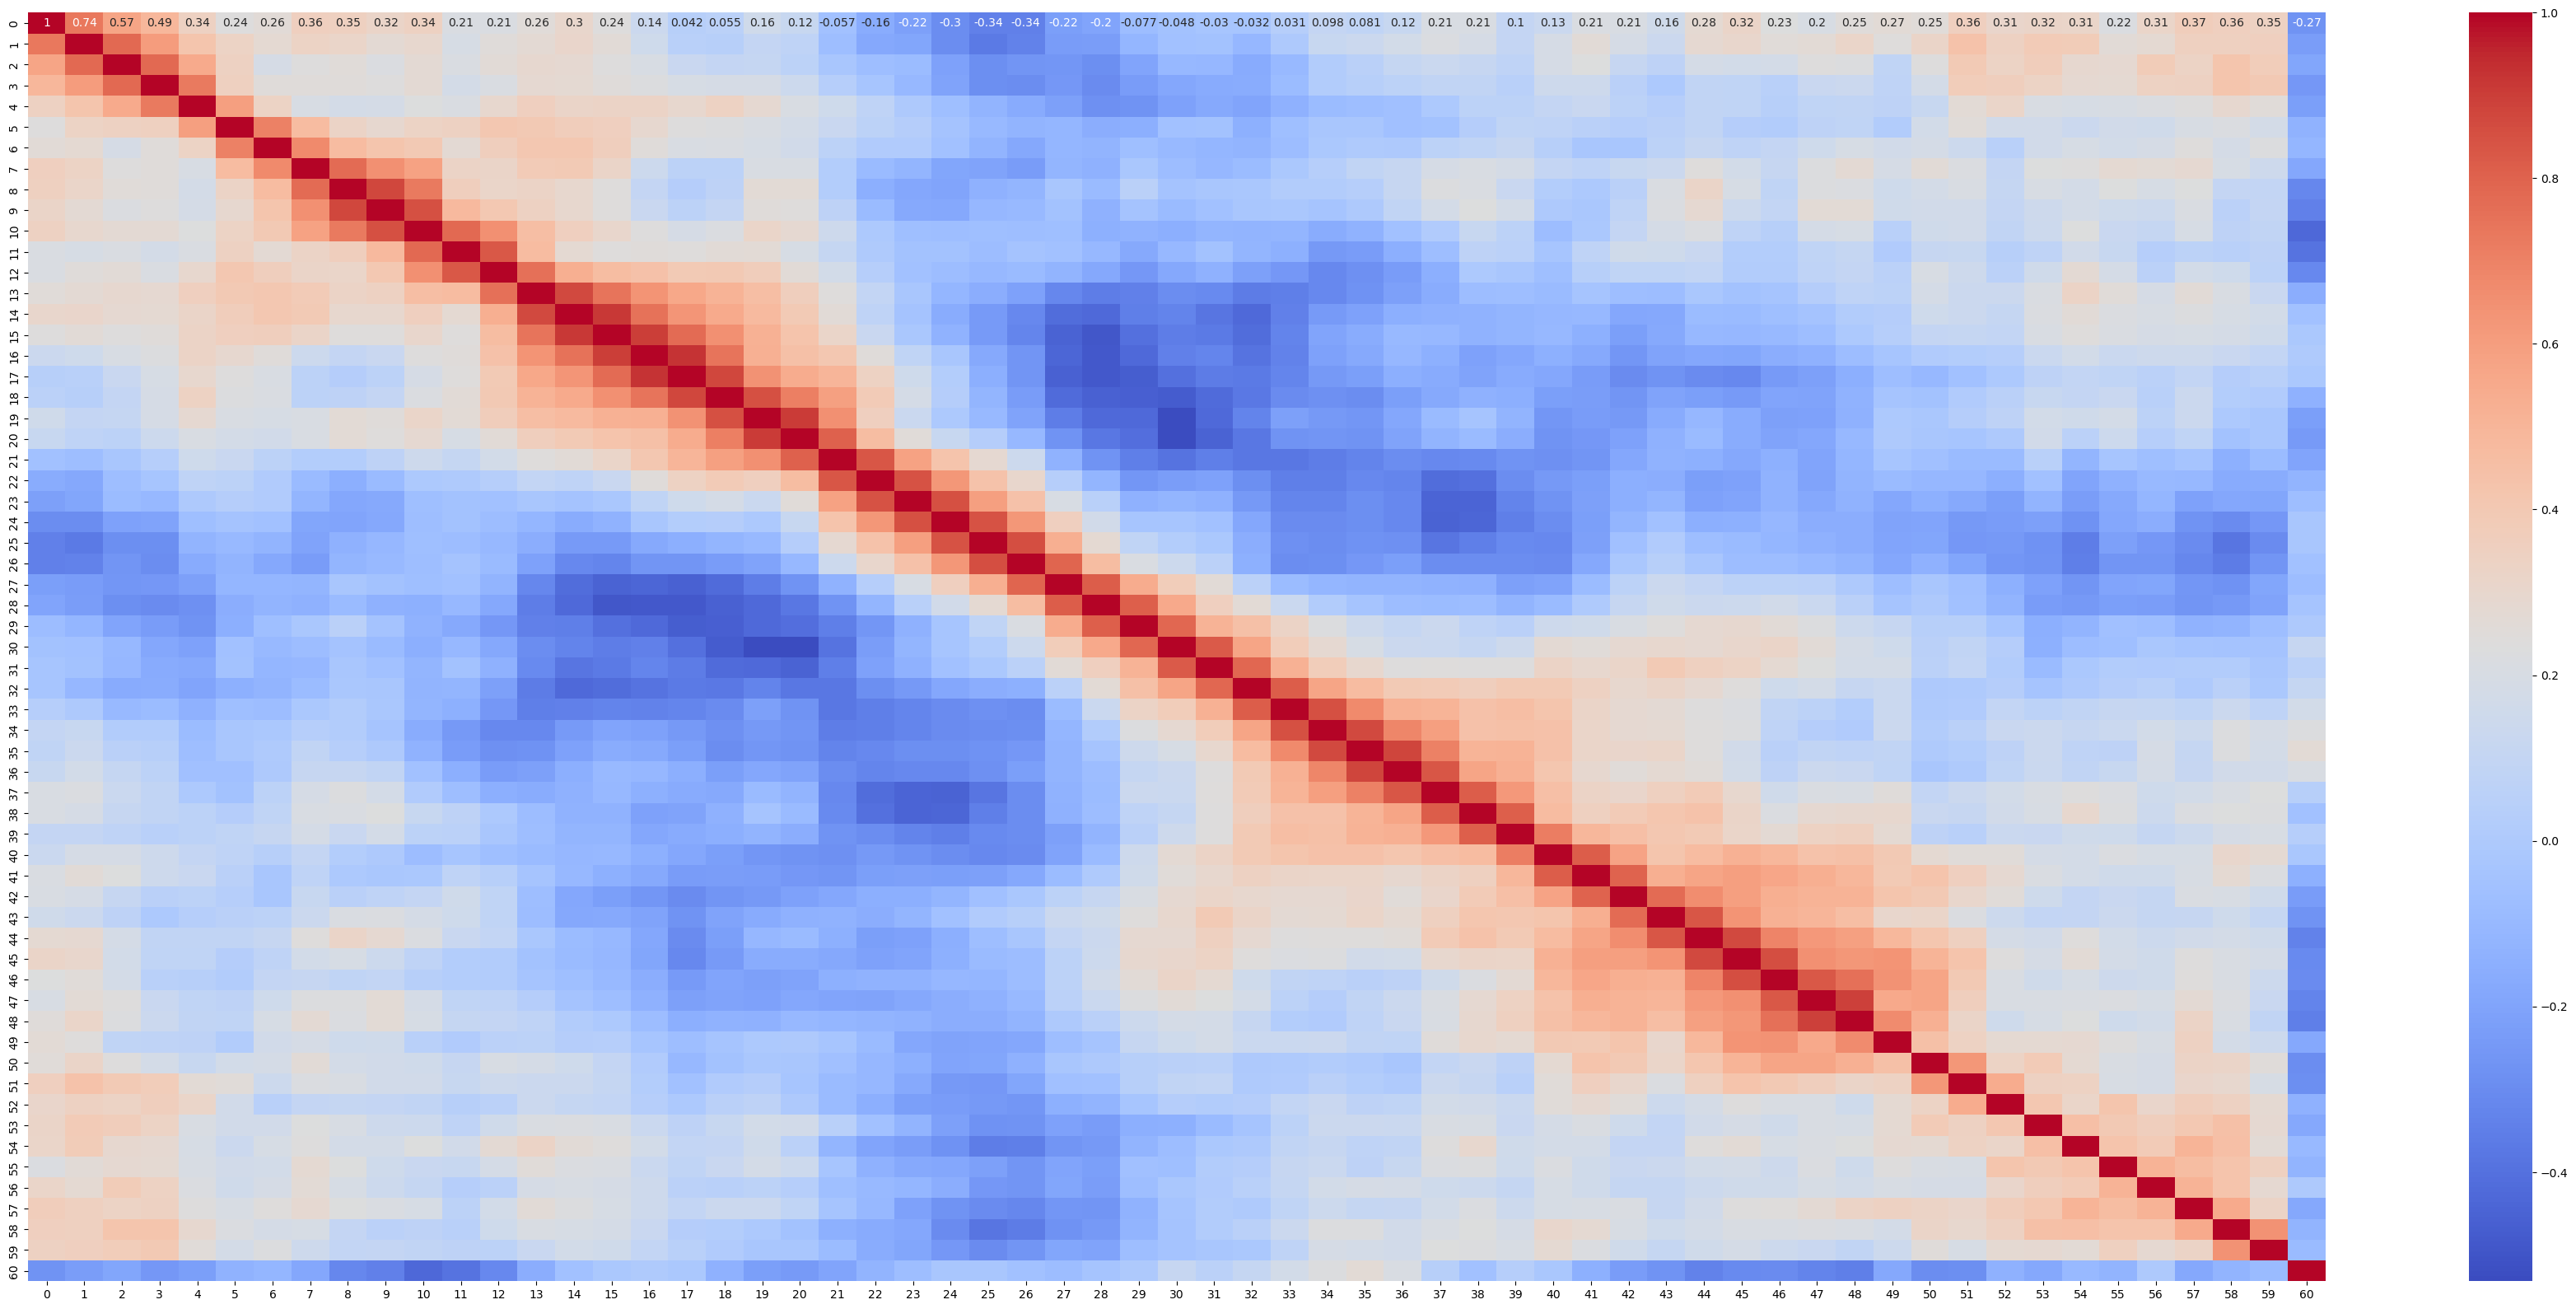

In [15]:
# Heatmap which shows the relationship between the Features 
plt.figure(figsize=(45,20))
sns.heatmap(df.corr(), annot =True, cmap = "coolwarm")

### 3. Splitting the Data into Test and Training Data

In [16]:
X = df.drop(columns =60, axis = 1)
Y = df[60]

In [17]:
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [18]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: 60, Length: 208, dtype: int64

In [19]:
# Splitting the data into Testing and Training Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state = 42, stratify = Y)

In [20]:
# Shape of the datasets
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (166, 60) (42, 60)


In [21]:
print(Y.shape, Y_train.shape, Y_test.shape)

(208,) (166,) (42,)


In [22]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
97,0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,...,0.0268,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439
132,0.0968,0.0821,0.0629,0.0608,0.0617,0.1207,0.0944,0.4223,0.5744,0.5025,...,0.0206,0.0073,0.0081,0.0303,0.0190,0.0212,0.0126,0.0201,0.0210,0.0041
201,0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,0.2660,...,0.0130,0.0120,0.0039,0.0053,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031
54,0.0132,0.0080,0.0188,0.0141,0.0436,0.0668,0.0609,0.0131,0.0899,0.0922,...,0.0136,0.0044,0.0028,0.0021,0.0022,0.0048,0.0138,0.0140,0.0028,0.0064
105,0.0116,0.0179,0.0449,0.1096,0.1913,0.0924,0.0761,0.1092,0.0757,0.1006,...,0.0031,0.0163,0.0099,0.0084,0.0270,0.0277,0.0097,0.0054,0.0148,0.0092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.0093,0.0185,0.0056,0.0064,0.0260,0.0458,0.0470,0.0057,0.0425,0.0640,...,0.0022,0.0069,0.0064,0.0129,0.0114,0.0054,0.0089,0.0050,0.0058,0.0025
116,0.0094,0.0333,0.0306,0.0376,0.1296,0.1795,0.1909,0.1692,0.1870,0.1725,...,0.0216,0.0153,0.0112,0.0241,0.0164,0.0055,0.0078,0.0055,0.0091,0.0067
87,0.0856,0.0454,0.0382,0.0203,0.0385,0.0534,0.2140,0.3110,0.2837,0.2751,...,0.0128,0.0172,0.0138,0.0079,0.0037,0.0051,0.0258,0.0102,0.0037,0.0037
78,0.0231,0.0351,0.0030,0.0304,0.0339,0.0860,0.1738,0.1351,0.1063,0.0347,...,0.0154,0.0106,0.0097,0.0022,0.0052,0.0072,0.0056,0.0038,0.0043,0.0030


In [23]:
Y_train

97     0
132    0
201    0
54     1
105    0
      ..
41     1
116    0
87     1
78     1
69     1
Name: 60, Length: 166, dtype: int64

### 4. Model Building

In [24]:
# Training the Model on the Training Data
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [25]:
# Making Predictions on the Training Data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
# The Accuracy Score for the Training Data
print(training_data_accuracy)

0.8674698795180723


In [27]:
# Making Predictions on the Testing Data
X_test_prediction = model.predict(X_test)
test_accuracy_score = accuracy_score(X_test_prediction,Y_test)

In [28]:
# The Accuracy Score for the Testing Data
print(test_accuracy_score)

0.8571428571428571


In [29]:
# Classification Report 
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.94      0.75      0.83        20

    accuracy                           0.86        42
   macro avg       0.87      0.85      0.85        42
weighted avg       0.87      0.86      0.86        42



In [30]:
# Confusion Matrix
print(confusion_matrix(Y_test,X_test_prediction))

[[21  1]
 [ 5 15]]


In [31]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')


[0]
The object is a Mine
